### Preamble

In [1]:
import numpy as np
import pandas as pd

import nltk
from gensim.models import Word2Vec, KeyedVectors

### Loading Google's Pretrained Model

In [2]:
model = KeyedVectors.load_word2vec_format('../dataset/GoogleNews.bin', binary=True)

### (Typical) Queries

In [3]:
model.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [4]:
model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [5]:
model.most_similar(model['king'] - model['man'] + model['woman'])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [6]:
model.most_similar(model['Germany'] - model['Berlin'] + model['Paris'])

[('France', 0.7724406123161316),
 ('Paris', 0.6798243522644043),
 ('Belgium', 0.598486065864563),
 ('Germany', 0.5652832388877869),
 ('extradites_Noriega', 0.5623601078987122),
 ('Villebon_Sur_Yvette', 0.5570637583732605),
 ('Spain', 0.550815761089325),
 ('Italy', 0.5462924838066101),
 ('Marseille', 0.5372346639633179),
 ('Switzerland', 0.5364957451820374)]

### Sample Verbs in 3D - Plane

In [ ]:
# pip install nltk pattern

In [8]:
from nltk.corpus import wordnet as wn
import nltk
# nltk.download('wordnet')

# Get base verbs from WordNet
base_verbs = list(set([lemma.name() for synset in wn.all_synsets('v') for lemma in synset.lemmas()]))


In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install pyinflect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
import nltk
# nltk.download('wordnet')
from nltk.corpus import wordnet as wn
nlp = spacy.load("en_core_web_sm")
import pyinflect  # Needed for token._.inflect()

# Function to get verb conjugations
def get_conjugations(verb):
    doc = nlp(verb)
    token = doc[0]
    present = token._.inflect("VBZ")  # Present tense (he/she/it)
    past = token._.inflect("VBD")     # Simple past
    future = "will " + verb           # Simple future
    return [verb, present, past]      # Future tensed skipped bc two words (will '_'), will focus on one word only as typical Tagalog conjugations are 1 word


print(get_conjugations("run"))
# Output: ['run', 'runs', 'ran', 'will run']

print(get_conjugations("eat"))
# Output: ['eat', 'eats', 'ate', 'will eat']


['run', 'runs', 'ran']
['eat', 'eats', 'ate']


In [19]:
# from nltk.corpus import wordnet as wn
# import nltk
nltk.download('wordnet')

base_verbs = list(set([lemma.name() for synset in wn.all_synsets('v') for lemma in synset.lemmas()]))
base_verbs = list(set(base_verbs))[:1000]  # limit to 1000 for testing

conjugated_verbs = []
for verb in base_verbs:
    try:
        forms = get_conjugations(verb)
        if all(forms):
            conjugated_verbs.append(forms)
    except:
        continue


[nltk_data] Downloading package wordnet to /home/osen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
vocab = set(model.key_to_index)

valid_verbs = [forms for forms in conjugated_verbs if all(f in vocab or " " in f for f in forms)]

In [21]:
valid_verbs

[['coexist', 'coexists', 'coexisted'],
 ['overheat', 'overheats', 'overheated'],
 ['interpolate', 'interpolates', 'interpolated'],
 ['grudge', 'grudges', 'grudged'],
 ['fit', 'fits', 'fitted'],
 ['ban', 'bans', 'banned'],
 ['control', 'controls', 'controlled'],
 ['better', 'wells', 'welled'],
 ['emote', 'emotes', 'emoted'],
 ['potter', 'potters', 'pottered'],
 ['hybridize', 'hybridizes', 'hybridized'],
 ['fructify', 'fructifies', 'fructified'],
 ['fluff', 'fluffs', 'fluffed'],
 ['retransmit', 'retransmits', 'retransmitted'],
 ['tinge', 'tinges', 'tinged'],
 ['clamor', 'clamors', 'clamored'],
 ['monitor', 'monitors', 'monitored'],
 ['whelp', 'whelps', 'whelped'],
 ['delude', 'deludes', 'deluded'],
 ['conscript', 'conscripts', 'conscripted'],
 ['storm', 'storms', 'stormed'],
 ['frame', 'frames', 'framed'],
 ['revolt', 'revolts', 'revolted'],
 ['gate', 'gates', 'gated'],
 ['operate', 'operates', 'operated'],
 ['oversimplify', 'oversimplifies', 'oversimplified'],
 ['quantify', 'quantifies'

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def plot_verb_conjugations_3d(model, verb_forms):
    """
    Plots the embeddings of a verb and its conjugated forms in 3D using PCA.

    Parameters:
    - model: A trained Word2Vec model (e.g., GoogleNews)
    - verb_forms: List of verb forms (e.g., ['run', 'runs', 'ran', 'will run'])
    """
    # Replace spaces with underscores to match Word2Vec token format
    words = [w.replace(" ", "_") for w in verb_forms]

    # Filter out words not in the model
    missing = [w for w in words if w not in model]
    if missing:
        print(f"Skipping because these words are missing from the model: {missing}")
        return

    # Extract vectors
    vectors = np.array([model[word] for word in words])

    # PCA to reduce to 3D
    pca = PCA(n_components=3)
    vectors_3d = pca.fit_transform(vectors)

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, word in enumerate(words):
        ax.scatter(*vectors_3d[i])
        ax.text(*vectors_3d[i], verb_forms[i], fontsize=10)

    ax.set_title(f"3D Embedding: '{verb_forms[0]}' and Conjugations")
    plt.show()


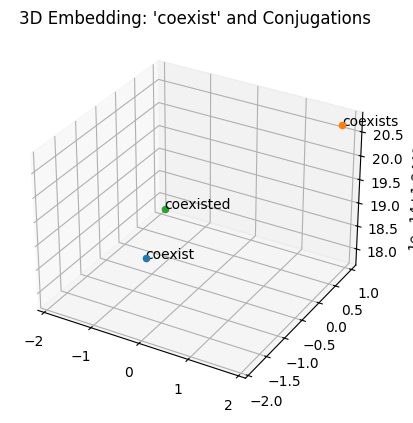

In [31]:
plot_verb_conjugations_3d(model, valid_verbs[0])

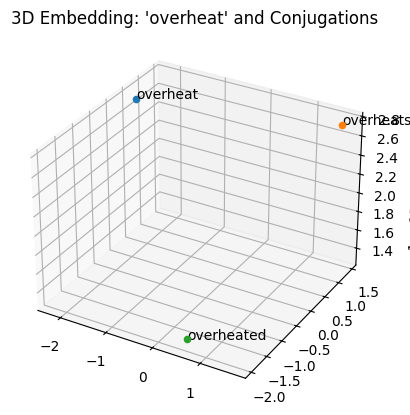

In [32]:
plot_verb_conjugations_3d(model, valid_verbs[1])

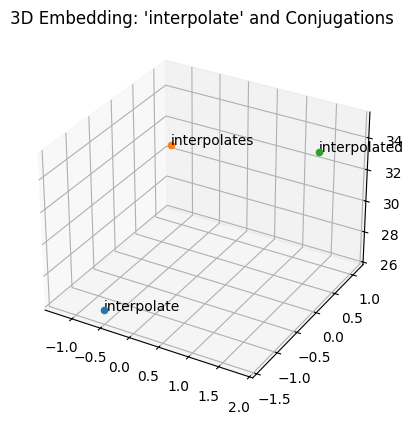

In [33]:
plot_verb_conjugations_3d(model, valid_verbs[2])

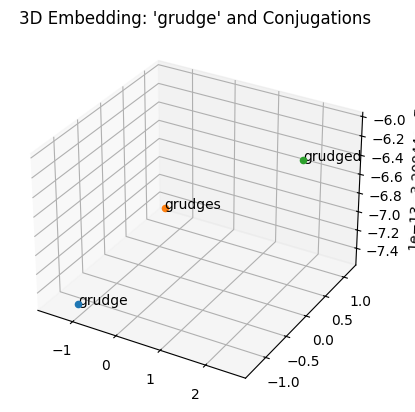

In [34]:
plot_verb_conjugations_3d(model, valid_verbs[3])